<a href="https://colab.research.google.com/github/ashimdahal/Keras-side-practice/blob/master/cnn_from_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.models import Sequential 

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
#  LOAD AND SPLIT DATASET
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data() 


X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
number_cat=10

y_train=keras.utils.to_categorical(y_train,number_cat)


X_train=X_train/255
X_test=X_test/255

Input_shape = X_train.shape[1:]


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
model=Sequential() 
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=Input_shape,padding='same')) 
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same')) 
model.add(MaxPooling2D(2,2))




model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same')) 
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same')) 

model.add(MaxPooling2D(2,2))


model.add(Dropout(0.4))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 8, 128)        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adagrad(lr=0.021),metrics=['accuracy'])
#set epochs to 100 for god level accuracy
epoch = 40
history=model.fit(X_train,y_train,validation_split=0.2 ,batch_size=32,epochs=epoch,shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 24s 596us/step - loss: 1.8697 - accuracy: 0.3141 - val_loss: 1.5236 - val_accuracy: 0.4708
Epoch 2/40
40000/40000 [==============================] - 23s 586us/step - loss: 1.4489 - accuracy: 0.4742 - val_loss: 1.3349 - val_accuracy: 0.5395
Epoch 3/40
40000/40000 [==============================] - 23s 583us/step - loss: 1.2554 - accuracy: 0.5508 - val_loss: 1.1948 - val_accuracy: 0.5926
Epoch 4/40
40000/40000 [==============================] - 23s 582us/step - loss: 1.0942 - accuracy: 0.6103 - val_loss: 0.9891 - val_accuracy: 0.6811
Epoch 5/40
40000/40000 [==============================] - 23s 586us/step - loss: 0.9830 - accuracy: 0.6542 - val_loss: 0.9360 - val_accuracy: 0.6977
Epoch 6/40
40000/40000 [==============================] - 24s 591us/step - loss: 0.8963 - accuracy: 0.6871 - val_loss: 0.8740 - val_accuracy: 0.7218
Epoch 7/40
40000/40000 [==============================] 

In [ ]:
prediction = model.predict_classes(X_test)

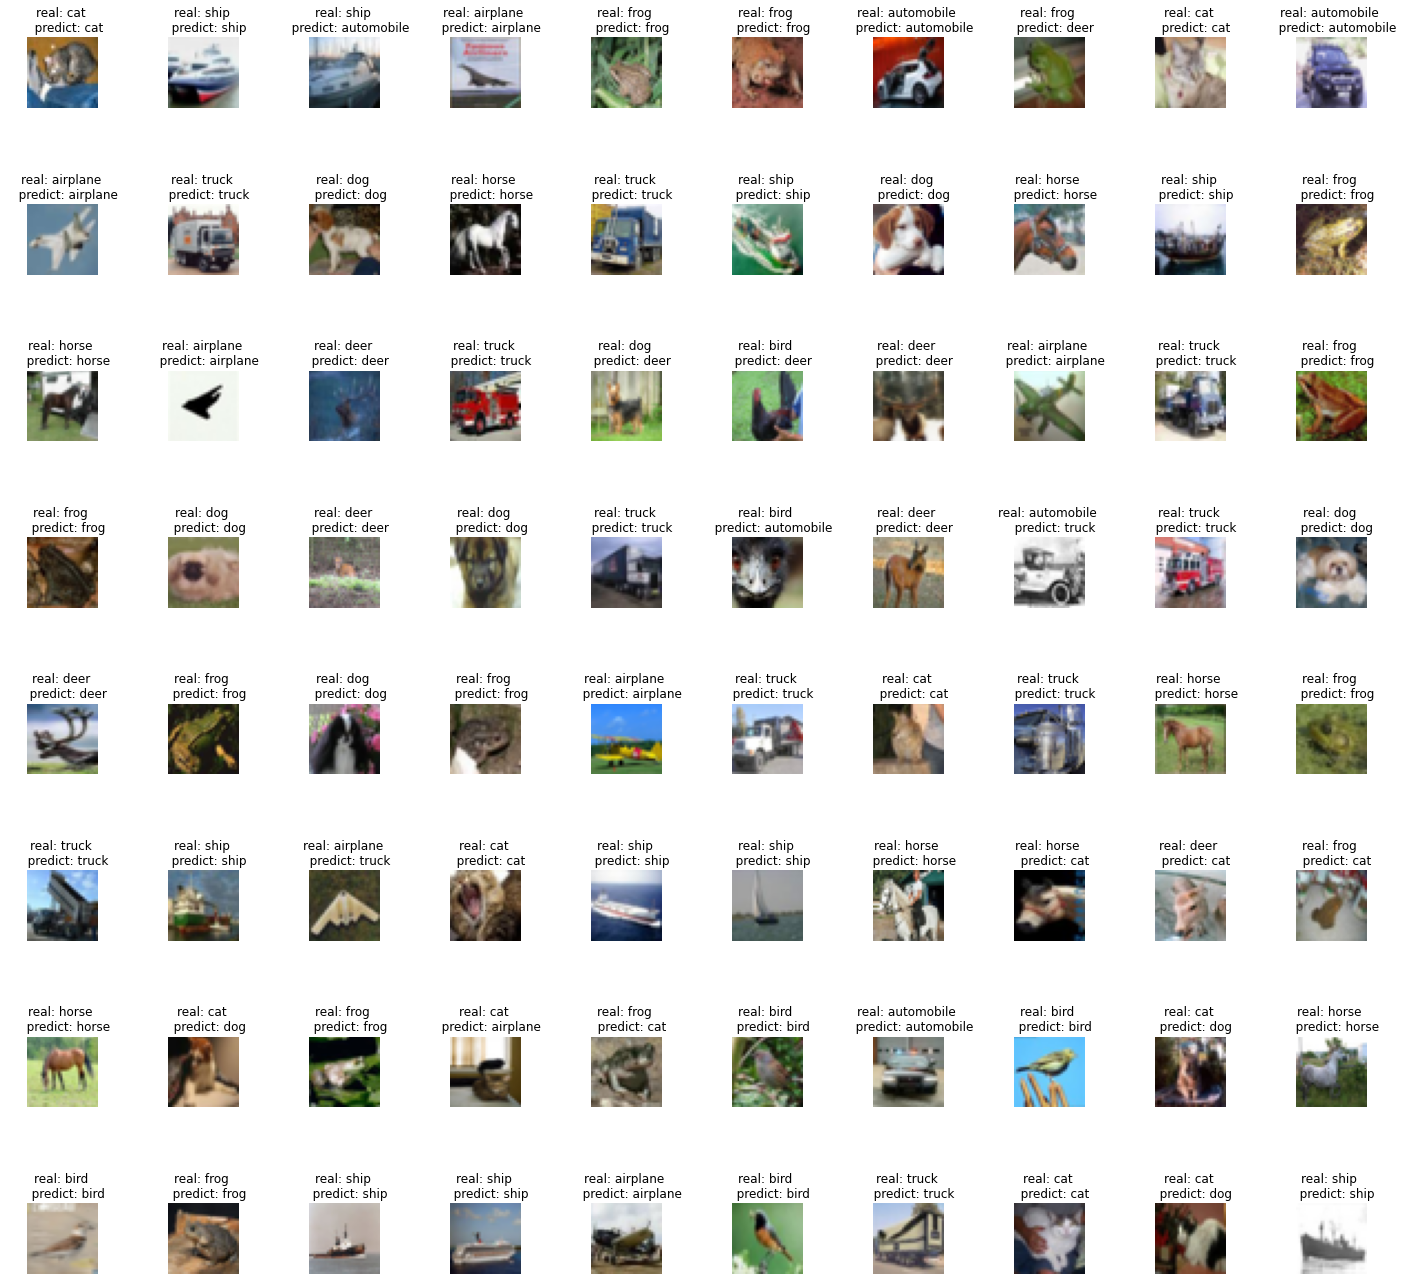

In [ ]:
L=8
W=10
fig,axes=plt.subplots(L,W,figsize=(24,24))
axes=axes.ravel()
y_test = np.array(y_test).reshape(-1).astype('int')
for i in range(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('real: {} \n   predict: {}'.format( class_names[y_test[i]] ,class_names[prediction[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)